In [1]:
import numpy as np
import gym

from keras import initializers
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Input, Concatenate
from keras.optimizers import Adam

from rl.agents import DDPGAgent
from rl.memory import SequentialMemory
from rl.random import OrnsteinUhlenbeckProcess

import matplotlib.pyplot as plt
%matplotlib inline

ENV_NAME = 'CoolingFin-v0'
gym.undo_logger_setup()


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
#np.random.seed(123)
#env.seed(123)
assert len(env.action_space.shape) == 1
nb_actions = env.action_space.shape[0]

# Next, we build a very simple model.
actor = Sequential()
#actor.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

actor.add(Flatten(input_shape=(1,) + env.observation_space.shape))
actor.add(Dense(40,kernel_initializer=initializers.RandomNormal(stddev=0.01)))
actor.add(Activation('tanh'))
actor.add(Dense(40,kernel_initializer=initializers.RandomNormal(stddev=0.01)))
actor.add(Activation('tanh'))
actor.add(Dense(16,kernel_initializer=initializers.RandomNormal(stddev=0.01)))
actor.add(Activation('tanh'))
actor.add(Dense(nb_actions,kernel_initializer=initializers.RandomNormal(stddev=0.01)))
actor.add(Activation('linear'))
#print(actor.summary())

action_input = Input(shape=(nb_actions,), name='action_input')
observation_input = Input(shape=(1,) + env.observation_space.shape, name='observation_input')
flattened_observation = Flatten()(observation_input)
x = Concatenate()([action_input, flattened_observation])
x = Dense(50)(x)
x = Activation('tanh')(x)
x = Dense(40)(x)
x = Activation('tanh')(x)
x = Dense(32)(x)
x = Activation('tanh')(x)
x = Dense(1)(x)
x = Activation('linear')(x)
critic = Model(inputs=[action_input, observation_input], outputs=x)
#critic.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
#print(critic.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=20, window_length=1)
random_process = OrnsteinUhlenbeckProcess(size=nb_actions, theta=.0, mu=0., sigma=.0)
agent = DDPGAgent(nb_actions=nb_actions, actor=actor, critic=critic, critic_action_input=action_input,
                  memory=memory, nb_steps_warmup_critic=10, nb_steps_warmup_actor=10,
                  random_process=random_process, gamma=.5, target_model_update=1e-3)
agent.compile(Adam(lr=.00001, clipnorm=1.), metrics=['mae'])
agent.test(env, nb_episodes=2, visualize=False, nb_max_episode_steps=1)

Using TensorFlow backend.
C:\Users\stevenbc\Anaconda3\lib\site-packages\gym\__init__.py:15: UserWarning: gym.undo_logger_setup is deprecated. gym no longer modifies the global logging configuration
  warnings.warn("gym.undo_logger_setup is deprecated. gym no longer modifies the global logging configuration")


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Testing for 2 episodes ...
[  4.53763596e-02   4.64342573e-02   4.74162192e-02   4.73677597e-02
   4.64944070e-02   4.69527134e-02   4.86276585e-02   4.94549150e-02
   4.47193062e-02   4.02260188e-02   5.00000000e+02   4.58233403e+02
   4.25004032e+02   3.98307231e+02   3.76358966e+02   3.58863162e+02
   3.46177579e+02   3.37792700e+02   3.32485207e+02   3.30033095e+02
   1.07249703e+03   6.86089512e-03]
Episode 1: reward: 1065.636, steps: 1
[  4.13307251e-02   4.32724825e-02   4.51296094e-02   4.72978556

Training for 30000 steps ...
Interval 1 (0 steps performed)
  11/3000 [..............................] - ETA: 56s - reward: 992.8031

C:\Users\stevenbc\Anaconda3\lib\site-packages\rl\memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


3000/3000 [==============================] - 57s 19ms/step - reward: 1265.1955
1064 episodes - episode_reward: 3512.908 [920.328, 11751.974] - loss: 808455.667 - mean_absolute_error: 1259.207 - mean_q: 5.379

Interval 2 (3000 steps performed)
  10/3000 [..............................] - ETA: 1:02 - reward: 1578.9299

C:\Users\stevenbc\Anaconda3\lib\site-packages\rl\memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


3000/3000 [==============================] - 62s 21ms/step - reward: 1743.0680
463 episodes - episode_reward: 11349.107 [4879.277, 423375.020] - loss: 1528968.875 - mean_absolute_error: 1733.297 - mean_q: 8.269

Interval 3 (6000 steps performed)
  11/3000 [..............................] - ETA: 52s - reward: 2125.3735

C:\Users\stevenbc\Anaconda3\lib\site-packages\rl\memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


3000/3000 [==============================] - 63s 21ms/step - reward: 2117.3883
15 episodes - episode_reward: 423467.885 [423325.386, 423593.093] - loss: 2232212.750 - mean_absolute_error: 2112.079 - mean_q: 9.569

Interval 4 (9000 steps performed)
   9/3000 [..............................] - ETA: 1:09 - reward: 2125.3735

C:\Users\stevenbc\Anaconda3\lib\site-packages\rl\memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


3000/3000 [==============================] - 38s 13ms/step - reward: 2117.5459
15 episodes - episode_reward: 423537.184 [423330.928, 423804.652] - loss: 2231846.250 - mean_absolute_error: 2111.918 - mean_q: 10.614

Interval 5 (12000 steps performed)
  15/3000 [..............................] - ETA: 42s - reward: 2125.3735

C:\Users\stevenbc\Anaconda3\lib\site-packages\rl\memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


3000/3000 [==============================] - 44s 15ms/step - reward: 2117.6146
15 episodes - episode_reward: 423502.186 [423215.031, 423793.031] - loss: 2230286.750 - mean_absolute_error: 2111.137 - mean_q: 11.624

Interval 6 (15000 steps performed)
  11/3000 [..............................] - ETA: 53s - reward: 2125.3735

C:\Users\stevenbc\Anaconda3\lib\site-packages\rl\memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


3000/3000 [==============================] - 64s 21ms/step - reward: 2117.6974
15 episodes - episode_reward: 423534.020 [423251.403, 423777.777] - loss: 2229332.500 - mean_absolute_error: 2110.708 - mean_q: 12.624

Interval 7 (18000 steps performed)
  10/3000 [..............................] - ETA: 1:03 - reward: 2125.3735

C:\Users\stevenbc\Anaconda3\lib\site-packages\rl\memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


3000/3000 [==============================] - 66s 22ms/step - reward: 2117.7877
15 episodes - episode_reward: 423544.701 [423367.626, 423857.685] - loss: 2228939.000 - mean_absolute_error: 2110.591 - mean_q: 13.622

Interval 8 (21000 steps performed)
   6/3000 [..............................] - ETA: 1:44 - reward: 2125.3735

C:\Users\stevenbc\Anaconda3\lib\site-packages\rl\memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


3000/3000 [==============================] - 67s 22ms/step - reward: 2117.5226
15 episodes - episode_reward: 423530.653 [423262.869, 423800.416] - loss: 2226567.250 - mean_absolute_error: 2109.375 - mean_q: 14.618

Interval 9 (24000 steps performed)
   7/3000 [..............................] - ETA: 1:26 - reward: 2125.3735

C:\Users\stevenbc\Anaconda3\lib\site-packages\rl\memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


3000/3000 [==============================] - 63s 21ms/step - reward: 2117.2985
15 episodes - episode_reward: 423463.993 [423252.862, 423634.984] - loss: 2225821.750 - mean_absolute_error: 2109.006 - mean_q: 15.615

Interval 10 (27000 steps performed)
   7/3000 [..............................] - ETA: 1:17 - reward: 2125.3735

C:\Users\stevenbc\Anaconda3\lib\site-packages\rl\memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


3000/3000 [==============================] - 39s 13ms/step - reward: 2117.4101
done, took 562.653 seconds


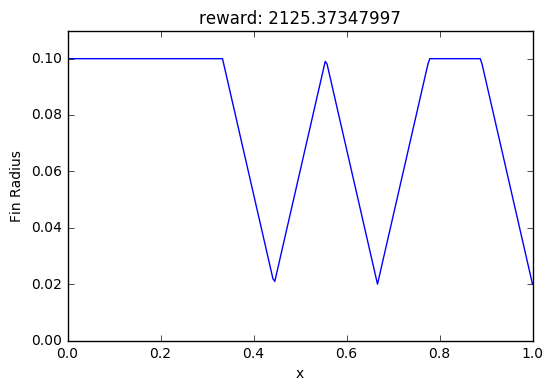

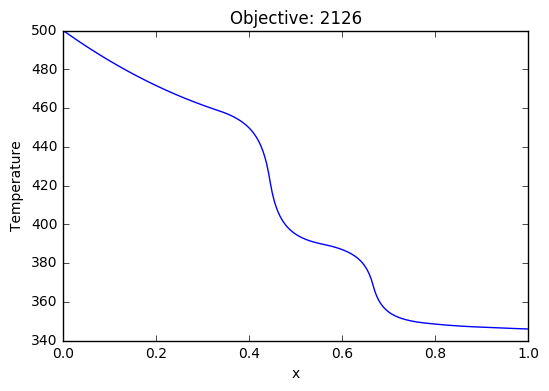

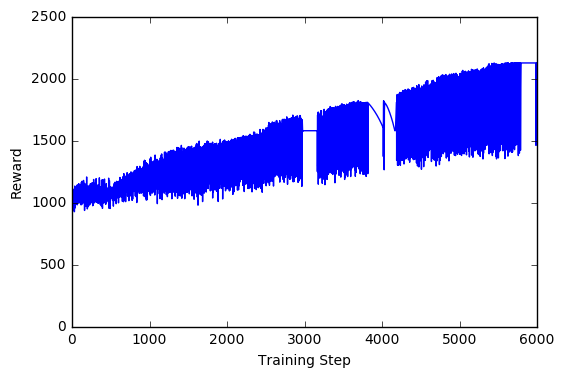

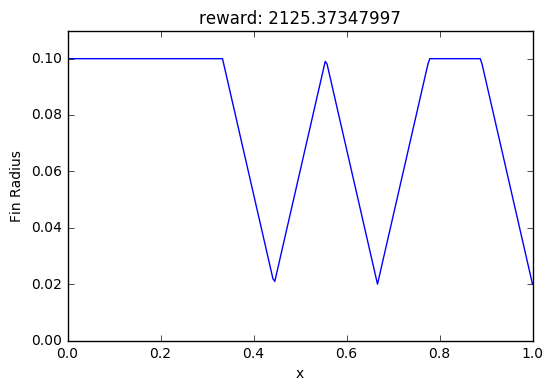

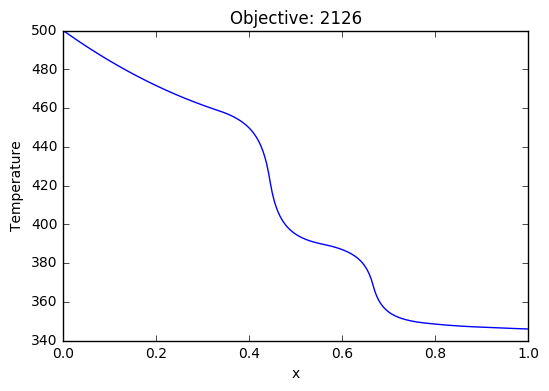

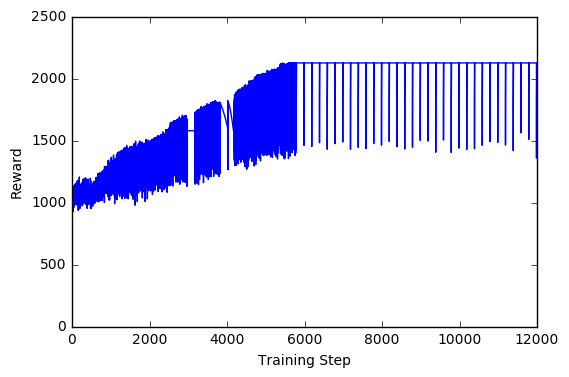

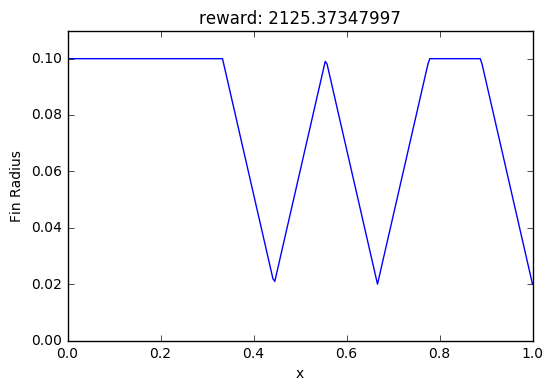

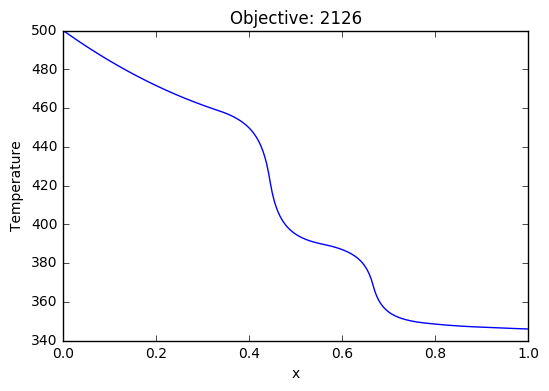

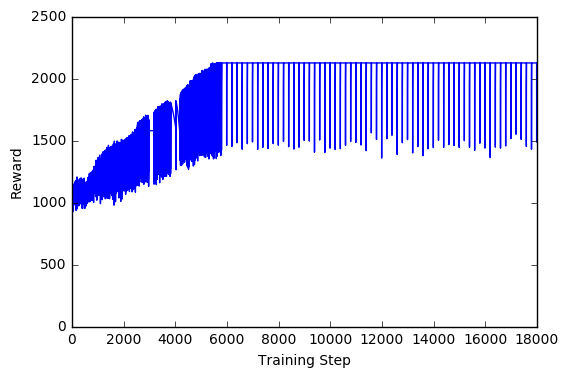

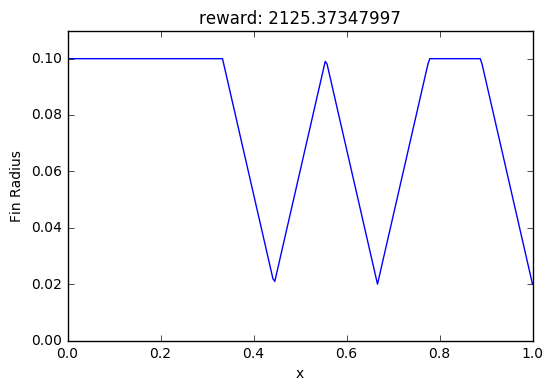

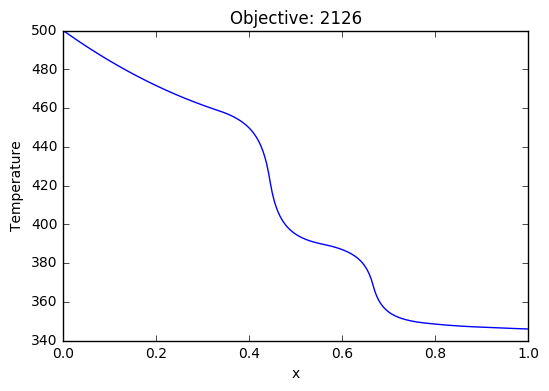

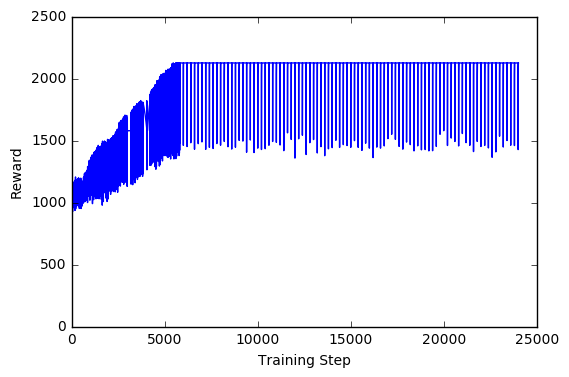

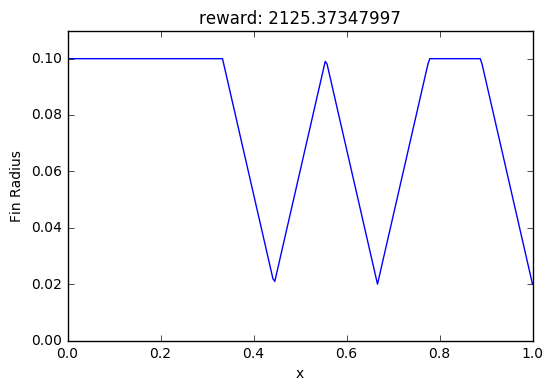

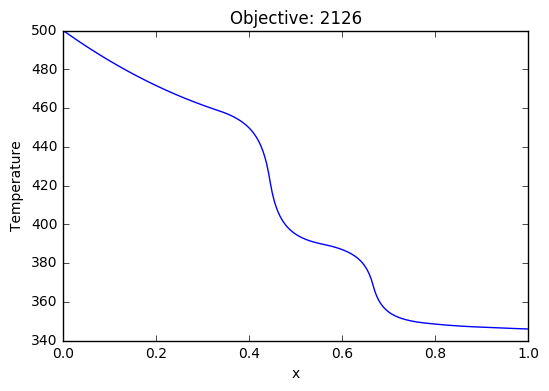

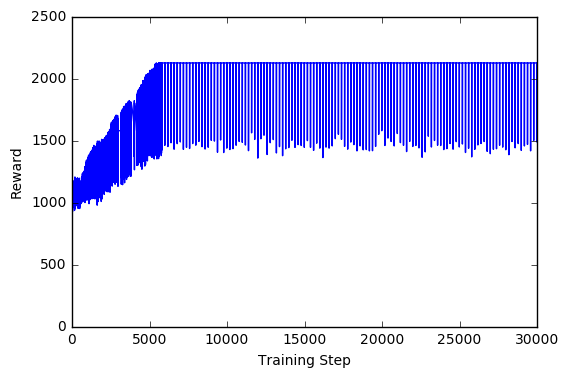

In [2]:
# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
agent.fit(env, nb_steps=30000, log_interval=3000,visualize=False, verbose=1, nb_max_episode_steps=200)

# After training is done, we save the final weights.
agent.save_weights('ddpg_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

In [9]:
# Finally, evaluate our algorithm for 5 episodes.
agent.test(env, nb_episodes=1, visualize=False, nb_max_episode_steps=10)

Testing for 1 episodes ...
[  1.00000000e-01   1.00000000e-01   1.00000000e-01   1.00000000e-01
   2.00000000e-02   1.00000000e-01   2.00000000e-02   1.00000000e-01
   1.00000000e-01   2.00000000e-02   5.00000000e+02   4.82799598e+02
   4.69093599e+02   4.58712696e+02   4.22889291e+02   3.89856254e+02
   3.68395089e+02   3.49029059e+02   3.47000365e+02   3.45936871e+02
   2.14654966e+03   2.11761778e-02]
Episode 1: reward: 19792.995, steps: 10


In [4]:
print(observation_input)
print(env.observation_space.shape)

Tensor("observation_input:0", shape=(?, 1, 22), dtype=float32)
(22,)


In [5]:
print(agent.nb_actions)
print(action_input)

10
Tensor("action_input:0", shape=(?, 10), dtype=float32)
